<h1>K-Nearest Neighbors</h1>

In [7]:
import numpy as np
import pandas as pd

<div id="about_dataset">
    <h3>About the dataset</h3>
</div>

A telecommunications provider has segmented its customers  by service usage patterns, categorizing the customers into four groups. 
the company can customize offers for individual  customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.
The target field, called <b>custcat</b>, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service
Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

In [9]:
filepath= 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv'

In [25]:
df = pd.read_csv(filepath)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


What are our labels?

In [26]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

In [27]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [28]:
x=df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
      'employ', 'retire', 'gender', 'reside']]
y=df['custcat']

<h3>Normalize Data</h3>

Data Standardization give data zero mean and unit variance

In [29]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(df).astype('float')

C:\Users\sara\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sara\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [19]:
x

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -1.03459817,
        -0.23065004, -1.32797979],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -1.03459817,
         2.55666158,  1.35119935],
       [ 1.19883553,  1.52109247,  0.82182601, ...,  0.96655883,
        -0.23065004,  0.45813963],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ...,  0.96655883,
        -0.92747794,  1.35119935],
       [ 1.19883553,  1.61477311,  0.58283046, ...,  0.96655883,
        -0.92747794,  0.45813963],
       [ 1.19883553,  0.67796676, -0.45281689, ...,  0.96655883,
         0.46617787, -0.43492008]])

<h3>Train Test Split </h3>

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model is to make correct predictions on unknown data. So  One way is to use an evaluation approach called Train/Test Split.

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)


<h2>Classification</h2>


<h3>K nearest neighbor (KNN)</h3>

Lets start the algorithm with k=4 

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
k = 4
neigh = KNeighborsClassifier(n_neighbors = k)
#Train Model and Predict 
neigh.fit(x_train,y_train)
yhat = neigh.predict(x_test)
yhat[0:5]

array([3, 1, 1, 2, 4], dtype=int64)

<h4>Accuracy evaluation</h4>

In multilabel classification, __accuracy classification score__ is a function that computes subset accuracy.  it calculates how closely the actual labels and predicted labels are matched in the test set.

In [36]:
from sklearn.metrics import accuracy_score

In [38]:
print("Train set Accuracy: ", accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Train set Accuracy:  0.82875
Test set Accuracy:  0.735


We can calculate the accuracy of KNN for different Ks.

In [49]:
list_order=[]
for k in range(1,11):
    neigh = KNeighborsClassifier(n_neighbors =k )
    neigh.fit(x_train,y_train)
    yhat = neigh.predict(x_test)
    list_order.append(accuracy_score(y_test, yhat))
list_order      

[0.76, 0.68, 0.725, 0.735, 0.73, 0.755, 0.775, 0.77, 0.765, 0.79]

we can see best k is equal to 7 with accuracy 0.775

Text(0, 0.5, 'accuracy')

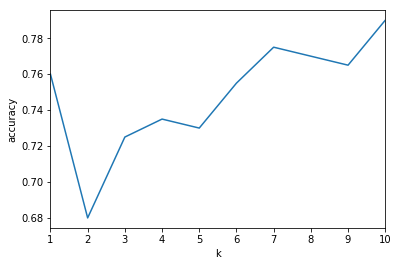

In [52]:
import matplotlib.pyplot as plt
indexes=[1,2,3,4,5,6,7,8,9,10]
df=pd.DataFrame(list_order)
df.index=indexes
df.loc[:,0].plot(kind='line')
plt.xlabel('k')
plt.ylabel('accuracy')